In [3]:
from copy import deepcopy
from sklearn import decomposition
from sklearn import datasets
import csv

filepath = '../../../4ormoreDATLOW.csv'
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets
from sklearn.cluster import KMeans

dataMatrix = pd.read_csv(filepath, index_col=0)
dataMatrix.loc[dataMatrix['class'] == 2.0, 'class'] = -1.0

arr = dataMatrix.values
numcols = len(arr[0]) - 1
#NOTE!! THIS MAKES IT SO WE ONLY SEE CIMP-HIGH
colheads = list(dataMatrix.index)
collabs = []
for x in range(0, len(arr)):
    if(arr[x][len(arr[0])-1] == 1.0):
        collabs.append(colheads[x])
print(collabs)
new = arr[(arr[:,numcols]==1.)]
arr = new
print("len: ",len(arr))


x = arr[:,0:numcols]
y = arr[:,numcols]
for m in range(len(y)):
    if y[m] == -1:
        y[m] = 0

# Create a Randomized PCA model that takes two components
randomized_pca = decomposition.RandomizedPCA(n_components=2) 

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(x)

# Create a regular PCA model 
pca = decomposition.PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(x)

# Inspect the shape
reduced_data_pca.shape

# Print out the data
print(len(reduced_data_pca))
print(reduced_data_pca)

dataMatrix

['TCGA-A6-2672', 'TCGA-A6-2676', 'TCGA-AA-3516', 'TCGA-AA-3518', 'TCGA-AA-3525', 'TCGA-AA-3543', 'TCGA-AA-3664', 'TCGA-AA-3672', 'TCGA-AA-3710', 'TCGA-AA-3715', 'TCGA-AA-3821', 'TCGA-AA-3833', 'TCGA-AA-3837', 'TCGA-AA-3845', 'TCGA-AA-3870', 'TCGA-AA-3877', 'TCGA-AA-3941', 'TCGA-AA-3947', 'TCGA-AA-3949', 'TCGA-AA-3994', 'TCGA-AA-A00A', 'TCGA-AA-A00D', 'TCGA-AA-A00E', 'TCGA-AA-A00J', 'TCGA-AA-A01P', 'TCGA-AA-A022', 'TCGA-AA-A029', 'TCGA-AA-A02O', 'TCGA-AA-A03F', 'TCGA-AG-3575', 'TCGA-AG-3600', 'TCGA-AG-A02X']
len:  32
32
[[-0.50052096 -0.2963234 ]
 [ 0.39428954  0.22596283]
 [-0.03969416 -0.42489546]
 [-0.22874612  0.0154859 ]
 [ 0.34351831 -0.93847369]
 [-0.31197713 -0.53762615]
 [-0.50052096 -0.2963234 ]
 [ 0.76299503  1.63882806]
 [ 0.31928657  1.41215364]
 [ 1.64628081  0.20699988]
 [ 0.41469812 -0.17026014]
 [ 0.85300064  0.77679713]
 [-0.85970449 -0.02190942]
 [ 0.46255854  0.00966046]
 [-0.99601084 -0.0068133 ]
 [ 0.94274075  0.83066824]
 [-0.99601084 -0.0068133 ]
 [ 1.96562851 -1

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


,BRAF_GRCh37_7:140453136-140453136_Missense-Mutation-SNP-A-A-T_Missense-Mutation-SNP-A-T-T,GRB14_GRCh37_2:165365288-165365296_In-Frame-Del-DEL-TTTTTTTTT----,MBD4_GRCh37_3:129155548-129155557_Frame-Shift-Del-DEL-TTTTTTTTTT----,PRDM2_GRCh37_1:14108749-14108757_In-Frame-Del-DEL-AAAAAAAAA----,HMMR_GRCh37_5:162917426-162917434_In-Frame-Del-DEL-AAAAAAAAA----,SEC63_GRCh37_6:108214755-108214764_Frame-Shift-Del-DEL-TTTTTTTTTT----,KRAS_GRCh37_12:25398284-25398284_Missense-Mutation-SNP-C-T-T,RAD50_GRCh37_5:131931452-131931460_In-Frame-Del-DEL-AAAAAAAAA----,ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----,MSH3_GRCh37_5:79970915-79970922_Frame-Shift-Del-DEL-AAAAAAAA----,ATR_GRCh37_3:142274740-142274749_Frame-Shift-Del-DEL-TTTTTTTTTT----,TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----,AIM2_GRCh37_1:159032487-159032496_Frame-Shift-Del-DEL-TTTTTTTTTT----,TCF7L2_GRCh37_10:114925317-114925325_In-Frame-Del-DEL-AAAAAAAAA----,class
TCGA-A6-2670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
TCGA-A6-2672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TCGA-A6-2674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
TCGA-A6-2676,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TCGA-A6-2677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
TCGA-A6-2678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
TCGA-A6-2683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
TCGA-A6-3807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
TCGA-A6-3808,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
TCGA-A6-3810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


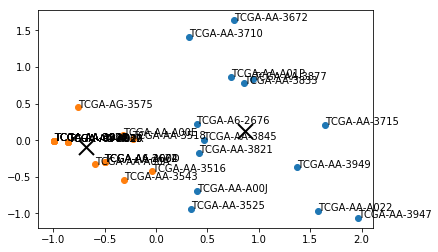

In [2]:
#calculate kmeans clustering
pts = []
for point in reduced_data_pca:
    pts.append([point[0],point[1]])
pts = np.array(pts)

kmeans = KMeans(n_clusters=2, random_state=0).fit(pts)

k = 2
kmeans.fit(pts)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
x = 0
for i in range(k):
    # select only data observations with cluster label == i
    ds = pts[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
    x += 1

for x in range(0,len(reduced_data_pca)):
    pyplot.annotate(collabs[x],(pts[x][0],pts[x][1]))

pyplot.show()

In [3]:
left = []
right = []
top = []
bottom = []

linv = {}
rinv = {}
tinv = {}
binv = {}

ltot = {}
rtot = {}
ttot = {}
btot = {}
for x in range(0,len(collabs)):
    if(labels[x] == 0):
        left.append(collabs[x])
    if(labels[x] == 1):
        right.append(collabs[x])
    if(labels[x] == 2):
        top.append(collabs[x])
    if(labels[x] == 3):
        bottom.append(collabs[x])

with open(filepath,'r') as f:
    it = csv.reader(f)
    listit = list(it)

#now inventory all of the mutations that appear in each of these sets
for x in range(1,len(listit)):
    if(listit[x][0] in left or listit[x][0] in right or listit[x][0] in top or listit[x][0] in bottom):
        for y in range(1,len(listit[0])-1):
            if(float(listit[x][y]) == 1.0):
                if(listit[x][0] in left):
                    #add mutation to the sample record
                    if(listit[x][0] not in linv):
                        linv[listit[x][0]] = []
                    linv[listit[x][0]].append(listit[0][y])
                    #add to totals of mutations
                    if(listit[0][y] not in ltot):
                        ltot[listit[0][y]] = 0
                    ltot[listit[0][y]] += 1
                if(listit[x][0] in right):
                    if(listit[x][0] not in rinv):
                        rinv[listit[x][0]] = []
                    rinv[listit[x][0]].append(listit[0][y])
                    if(listit[0][y] not in rtot):
                        rtot[listit[0][y]] = 0
                    rtot[listit[0][y]] += 1
                if(listit[x][0] in top):
                    if(listit[x][0] not in tinv):
                        tinv[listit[x][0]] = []
                    tinv[listit[x][0]].append(listit[0][y])
                    if(listit[0][y] not in ttot):
                        ttot[listit[0][y]] = 0
                    ttot[listit[0][y]] += 1
                if(listit[x][0] in bottom):
                    if(listit[x][0] not in binv):
                        binv[listit[x][0]] = []
                    binv[listit[x][0]].append(listit[0][y])
                    if(listit[0][y] not in btot):
                        btot[listit[0][y]] = 0
                    btot[listit[0][y]] += 1
                    
lhead = []
rhead = []
thead = []
bhead = []
for mut in ltot:
    lhead.append(mut)
for mut in rtot:
    rhead.append(mut)
for mut in ttot:
    thead.append(mut)
for mut in btot:
    bhead.append(mut)
sampsummL = [lhead]
sampsummR = [rhead]
sampsummT = [thead]
sampsummB = [bhead]

for k in linv:
    newrow = [k]
    for mut in lhead:
        if mut in linv[k]:
            newrow.append("X")
        else:
            newrow.append("")
    sampsummL.append(newrow)
sampsummL

for k in tinv:
    newrow = [k]
    for mut in thead:
        if mut in tinv[k]:
            newrow.append("X")
        else:
            newrow.append("")
    sampsummT.append(newrow)
sampsummT

for k in rinv:
    newrow = [k]
    for mut in rhead:
        if mut in rinv[k]:
            newrow.append("X")
        else:
            newrow.append("")
    sampsummR.append(newrow)
sampsummR

for k in binv:
    newrow = [k]
    for mut in bhead:
        if mut in binv[k]:
            newrow.append("X")
        else:
            newrow.append("")
    sampsummB.append(newrow)
sampsummB

[[]]

In [4]:
print("CLUST1 MUTATION TOTALS:\n")
ltot = sorted(ltot.items(),key=lambda x: int(x[1]),reverse=True)

ltot

CLUST1 MUTATION TOTALS:



[('BRAF_GRCh37_7:140453136-140453136_Missense-Mutation-SNP-A-A-T_Missense-Mutation-SNP-A-T-T',
  11),
 ('ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----', 11),
 ('TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----', 10),
 ('GRB14_GRCh37_2:165365288-165365296_In-Frame-Del-DEL-TTTTTTTTT----', 7),
 ('SEC63_GRCh37_6:108214755-108214764_Frame-Shift-Del-DEL-TTTTTTTTTT----', 7),
 ('MSH3_GRCh37_5:79970915-79970922_Frame-Shift-Del-DEL-AAAAAAAA----', 7),
 ('AIM2_GRCh37_1:159032487-159032496_Frame-Shift-Del-DEL-TTTTTTTTTT----', 6),
 ('MBD4_GRCh37_3:129155548-129155557_Frame-Shift-Del-DEL-TTTTTTTTTT----', 5),
 ('HMMR_GRCh37_5:162917426-162917434_In-Frame-Del-DEL-AAAAAAAAA----', 5),
 ('PRDM2_GRCh37_1:14108749-14108757_In-Frame-Del-DEL-AAAAAAAAA----', 4),
 ('ATR_GRCh37_3:142274740-142274749_Frame-Shift-Del-DEL-TTTTTTTTTT----', 4),
 ('TCF7L2_GRCh37_10:114925317-114925325_In-Frame-Del-DEL-AAAAAAAAA----', 4),
 ('RAD50_GRCh37_5:131931452-131931460_In-Frame-Del-DEL-

In [5]:
print("CLUST2 MUTATION TOTALS:\n")
rtot = sorted(rtot.items(),key=lambda x: int(x[1]),reverse=True)

rtot

CLUST2 MUTATION TOTALS:



[('BRAF_GRCh37_7:140453136-140453136_Missense-Mutation-SNP-A-A-T_Missense-Mutation-SNP-A-T-T',
  5),
 ('KRAS_GRCh37_12:25398284-25398284_Missense-Mutation-SNP-C-T-T', 5),
 ('RAD50_GRCh37_5:131931452-131931460_In-Frame-Del-DEL-AAAAAAAAA----', 3),
 ('SEC63_GRCh37_6:108214755-108214764_Frame-Shift-Del-DEL-TTTTTTTTTT----', 1),
 ('ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----', 1),
 ('MSH3_GRCh37_5:79970915-79970922_Frame-Shift-Del-DEL-AAAAAAAA----', 1),
 ('PRDM2_GRCh37_1:14108749-14108757_In-Frame-Del-DEL-AAAAAAAAA----', 1),
 ('TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----', 1),
 ('MBD4_GRCh37_3:129155548-129155557_Frame-Shift-Del-DEL-TTTTTTTTTT----', 1)]

In [6]:
print("CLUST3 MUTATION TOTALS:\n")
ttot = sorted(ttot.items(),key=lambda x: int(x[1]),reverse=True)

ttot

CLUST3 MUTATION TOTALS:



[]

In [7]:
print("CLUST4 MUTATION TOTALS:\n")
btot = sorted(btot.items(),key=lambda x: int(x[1]),reverse=True)

btot

CLUST4 MUTATION TOTALS:



[]